In this assignment you will continue to make some plots on the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). For plotting you will use Seaborn library. 

**(1)** Plot a line plot with seaborn for total deaths four the four countries (Spain, France, Germany, Italy) after April 1, 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)

In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


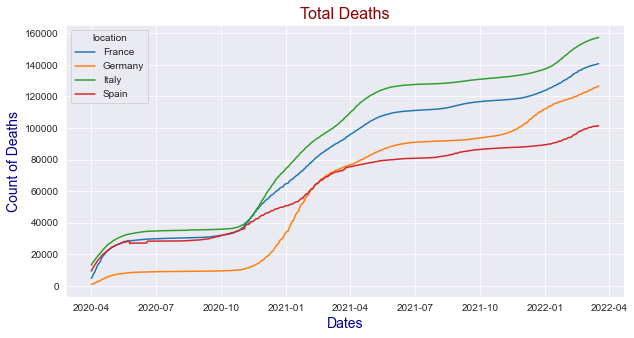

In [3]:
title_style = {'family': 'Arial', 'color': 'darkred', 'size': 16 }
axis_style  = {'family': 'Arial', 'color': 'darkblue', 'size': 14 }


data = df[(df['date'] >= '2020-04-01') & (df['location'].isin(['Spain', 'France', 'Germany', 'Italy']))]

plt.figure(figsize=(10, 5))                                                               
sns.lineplot(data=data ,x='date', y='total_deaths', hue='location')            
plt.title('Total Deaths', fontdict=title_style)
plt.xlabel('Dates', fontdict=axis_style)
plt.ylabel('Count of Deaths', fontdict=axis_style)
plt.show()


**(2)** Plot a bar plot with seaborn for average death number that compares continents.

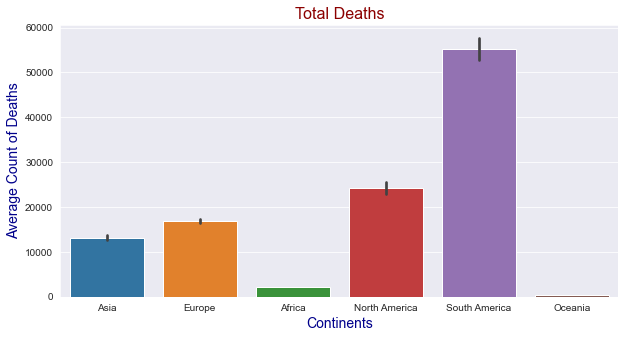

In [4]:
plt.figure(figsize=(10,5))

sns.barplot(x='continent', y='total_deaths',
            data=df, palette='tab10')

plt.title('Total Deaths', fontdict=title_style)
plt.xlabel('Continents', fontdict=axis_style)
plt.ylabel('Average Count of Deaths', fontdict=axis_style)
plt.show()

**(3)**  Plot a histogram for daily deaths for any country you choose. Make four subplots for different bin counts and `kde` arguments.

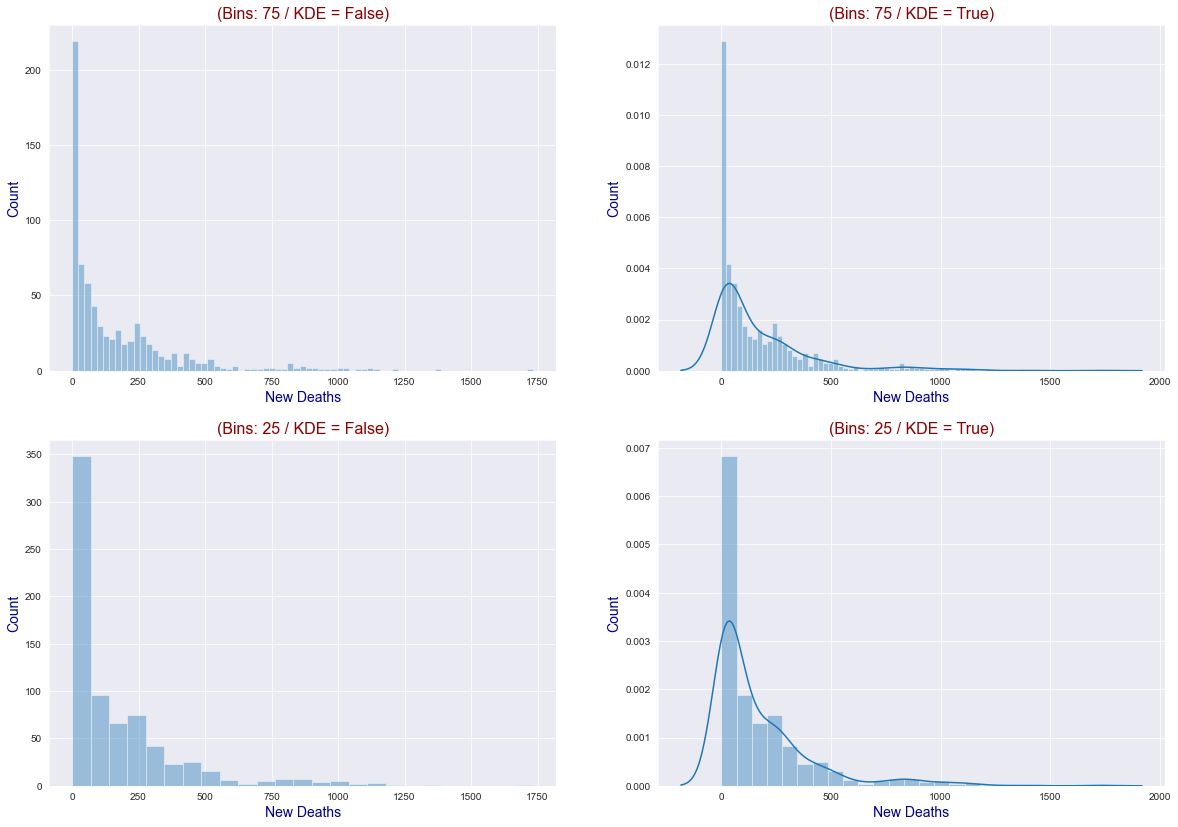

In [5]:
plt.figure(figsize=(20, 14))

germany = df[df['location']=='Germany'] 

bins = [75, 25]
kdes = [False, True]
i = 1
for bin_ in bins:
    for kde in kdes:
        plt.subplot(2, 2, i)
        sns.distplot(germany['new_deaths'].dropna(), bins=bin_, kde=kde)
        plt.title(f'(Bins: {bin_} / KDE = {kde})', fontdict=title_style)
        plt.xlabel('New Deaths', fontdict=axis_style)
        plt.ylabel('Count', fontdict=axis_style)
        i += 1 

**(4)** Create a figure and three subplots containing boxplot, violin plot and swarm plot for daily deaths of two countries you choose.

In [6]:
countries = df[df['location'].isin(['France','Germany'])]

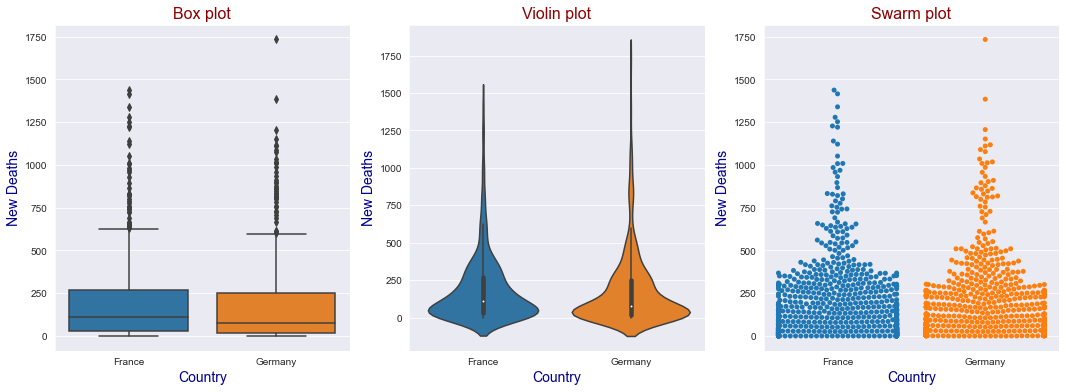

In [7]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='location', y='new_deaths', data=countries)
plt.title('Box plot', fontdict=title_style)
plt.xlabel('Country', fontdict=axis_style)
plt.ylabel('New Deaths', fontdict=axis_style)

plt.subplot(1, 3, 2)
sns.violinplot(x='location', y='new_deaths', data=countries)
plt.title('Violin plot', fontdict=title_style)
plt.xlabel('Country', fontdict=axis_style)
plt.ylabel('New Deaths', fontdict=axis_style)


plt.subplot(1, 3, 3)
sns.swarmplot(x='location', y='new_deaths', data=countries)
plt.title('Swarm plot', fontdict=title_style)
plt.xlabel('Country', fontdict=axis_style)
plt.ylabel('New Deaths', fontdict=axis_style)

plt.show()